In [112]:
from sklearn.datasets import load_boston

In [113]:
data = load_boston()

In [114]:
x, y = data['data'], data['target']

In [115]:
%matplotlib inline

In [116]:
import matplotlib.pyplot as plt

In [117]:
def draw_rm_and_price():
    plt.scatter(x[:, 5], y)

In [118]:
import random

In [119]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

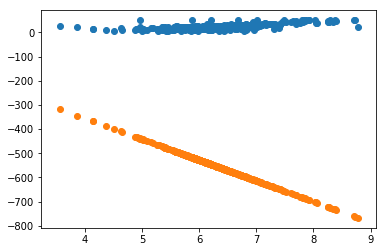

In [120]:
x_rm = x[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)

In [121]:
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

## First-Method: Random generation: get best k and best b

In [122]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 29.219361735245116 best_b: 51.71825620314979, and the loss is: 45534.69117274561
When time is : 15, get best_k: -14.518023923025126 best_b: -46.485274913702646, and the loss is: 26001.284482700383
When time is : 18, get best_k: 22.681802284885237 best_b: -20.12741309296527, and the loss is: 10111.793419826417
When time is : 22, get best_k: 4.379482330799462 best_b: 57.302549717016916, and the loss is: 3935.0305848532735
When time is : 28, get best_k: -8.555619999755379 best_b: 50.955750046511326, and the loss is: 839.6403628099689
When time is : 29, get best_k: -10.076987524032305 best_b: 61.97383721727411, and the loss is: 795.5240035682237
When time is : 92, get best_k: 9.803034361657254 best_b: -21.853491527293187, and the loss is: 340.4464050434632
When time is : 213, get best_k: 0.8833750628466532 best_b: 6.22642649307987, and the loss is: 192.5442933407803
When time is : 227, get best_k: -1.1831534496952116 best_b: 30.38754746108941, and the loss is:

## 方法一图像

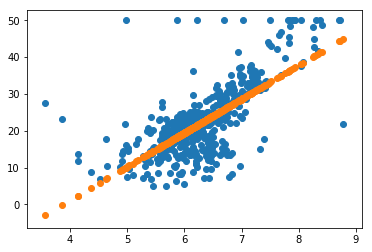

In [123]:
x_rm = x[:, 5]
k = 9.193791618649499
b = -35.70327768273354
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

## 2nd-Method: Direction Adjusting

In [124]:
trying_times = 2000

min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b =  random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

scalar = 0.1

update_time = 0

next_direction = random.choice(direction)

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in x_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        next_direction = next_direction
        update_time += 1

        if update_time % 10 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)
        
        

When time is : 11, get best_k: -76.35823758014438 best_b: 69.41904966270499, and the loss is: 191128.7014648985
When time is : 21, get best_k: -75.35823758014443 best_b: 68.41904966270505, and the loss is: 186496.44421183725
When time is : 31, get best_k: -74.35823758014449 best_b: 67.4190496627051, and the loss is: 181921.02707042385
When time is : 41, get best_k: -73.35823758014455 best_b: 66.41904966270516, and the loss is: 177402.45004065885
When time is : 51, get best_k: -72.3582375801446 best_b: 65.41904966270522, and the loss is: 172940.71312254248
When time is : 61, get best_k: -71.35823758014466 best_b: 64.41904966270528, and the loss is: 168535.8163160739
When time is : 71, get best_k: -70.35823758014472 best_b: 63.41904966270529, and the loss is: 164187.75962125367
When time is : 81, get best_k: -69.35823758014477 best_b: 62.41904966270528, and the loss is: 159896.54303808158
When time is : 91, get best_k: -68.35823758014483 best_b: 61.41904966270526, and the loss is: 155662

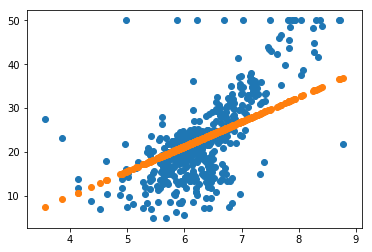

In [125]:
x_rm = x[:, 5]
k = 5.641762419855564
b = -12.580950337295315
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

## 导数

In [126]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [134]:
trying_times = 2000

# X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-02

update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(x_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(x_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 123645.7531011396
When time is : 50, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 93.25708626875631
When time is : 100, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 92.07708718137627
When time is : 150, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 90.92512867033322
When time is : 200, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 89.80054440128046
When time is : 250, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 88.70268387411973
When time is : 300, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 87.6309120467289
When time is : 350, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 86.58460896763059
When time is : 400, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss 

## 图像

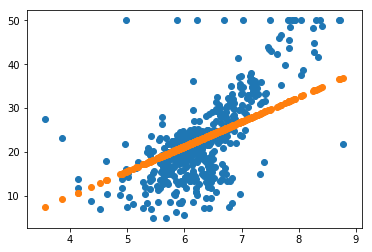

In [129]:
x_rm = x[:, 5]
k = 5.641762419855564
b = -12.580950337295315
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

## 绝对值求导

In [143]:
def abs_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i - y_hat_i > 0 :
            gradient += x_i
        elif y_i - y_hat_i < 0 :
            gradient += -x_i
        else:
            continue
    
    return -1 * gradient / n 


def abs_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i - y_hat_i > 0 :
            gradient += 1
        elif y_i - y_hat_i < 0 :
            gradient += -1
        else:
            continue
    
    return -1 / n * gradient

In [155]:
trying_times = 2000

# X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-02

update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = abs_k(x_rm, y, price_by_k_and_b)
    
    b_gradient = abs_b(x_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 11168.095617627774
When time is : 50, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 7286.923704871036
When time is : 100, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 4235.4701879686445
When time is : 150, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 2013.7350669205425
When time is : 200, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 621.7183417267515
When time is : 250, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 77.40313477623133
When time is : 300, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 46.40587523377138
When time is : 350, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the loss is: 46.36628202363456
When time is : 400, get best_k: 5.641762419855564 best_b: -12.580950337295315, and the l

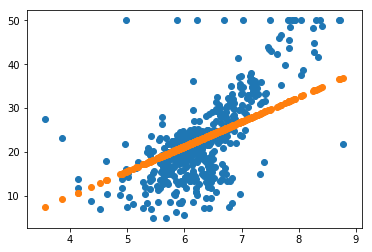

In [154]:
x_rm = x[:, 5]
k = 5.641762419855564
b = -12.580950337295315
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  